# **MSDS-670: Data Visualization** Week-5 Project - *`Tech Hiring & Layoffs Analysis (2000 - 2025)`*


**Project Description:**
- In this project, I will analyze workforce trends in the technology industry from 2000 to 2025. The objective of this analysis is to explore patterns in hiring, layoffs, and overall employment changes across major tech companies over a 25-year period.

- Using Python and the matplotlib library, I will create 3-5 distinct data visualization charts to examine industry trends over time, compare company-level workforce reductions, and analyze potential relationships between financial performance and employment decisions.

- The goal of this project is to use data visualization techniques to transform workforce data into meaningful insights and identify long-term trends in the technology sector.

**Dataset Description:**
- The dataset used in this project is titled “Tech Hiring & Layoffs: Workforce Data (2000–2025).” It contains company-level workforce and financial data for major technology firms over a 25-year period.

- The dataset includes variables such as employee counts at the start and end of each year, number of new hires, number of layoffs, net workforce changes, revenue (in billions USD), stock price percentage changes, and selected U.S. economic indicators including GDP growth and unemployment rate.

- This structured dataset allows for analysis of both company-specific workforce decisions and broader industry-wide trends across time.

### **`Importing Required Libraries:`**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **`Loading and Inspecting the Dataset:`**

In [3]:
data = pd.read_csv('tech_employment_2000_2025.csv')

data.head(10)

,company,year,employees_start,employees_end,new_hires,layoffs,net_change,hiring_rate_pct,attrition_rate_pct,revenue_billions_usd,stock_price_change_pct,gdp_growth_us_pct,unemployment_rate_us_pct,is_estimated,confidence_level,data_quality_score
0,AMD,2001,13387,14400,2083,1070,1013,15.6,8.0,3.89,25.1,1.0,4.7,False,Medium,95
1,AMD,2002,14400,12500,0,1900,-1900,0.0,13.2,2.70,42.8,1.7,5.8,False,Medium,95
2,AMD,2003,12500,12000,0,500,-500,0.0,4.0,3.52,-1.8,2.8,6.0,False,Medium,95
3,AMD,2004,12000,11700,60,360,-300,0.5,3.0,5.00,-18.6,3.8,5.5,False,Medium,95
4,AMD,2005,11700,9860,0,1840,-1840,0.0,15.7,5.85,15.2,3.5,5.1,False,Medium,95
5,AMD,2006,9860,16000,6435,295,6140,65.3,3.0,5.65,47.2,2.8,4.6,False,Medium,95
6,AMD,2007,16000,16420,900,480,420,5.6,3.0,6.01,-8.1,2.0,4.6,False,Medium,95
7,AMD,2008,16420,10300,0,6120,-6120,0.0,37.3,5.81,-19.7,0.1,5.8,False,Medium,95
8,AMD,2009,10300,10400,924,824,100,9.0,8.0,5.40,35.6,-2.6,9.3,False,Medium,95
9,AMD,2010,10400,11100,1012,312,700,9.7,3.0,6.49,0.0,2.7,9.6,False,High,95


In [4]:
# Checking the shape of the dataset:

data.shape

(532, 16)

In [5]:
# Inspecting all the columns in the data:

data.columns

Index(['company', 'year', 'employees_start', 'employees_end', 'new_hires',
       'layoffs', 'net_change', 'hiring_rate_pct', 'attrition_rate_pct',
       'revenue_billions_usd', 'stock_price_change_pct', 'gdp_growth_us_pct',
       'unemployment_rate_us_pct', 'is_estimated', 'confidence_level',
       'data_quality_score'],
      dtype='object')

In [6]:
# Checking for missing values in the data:

data.isnull().sum()

company                     0
year                        0
employees_start             0
employees_end               0
new_hires                   0
layoffs                     0
net_change                  0
hiring_rate_pct             0
attrition_rate_pct          0
revenue_billions_usd        0
stock_price_change_pct      0
gdp_growth_us_pct           0
unemployment_rate_us_pct    0
is_estimated                0
confidence_level            0
data_quality_score          0
dtype: int64

### **`Basic EDA:`**

In [8]:
# Encoding the Confidece levels by mapping with the numerical order:

# First, checking the comon levels in the confidence level columns:

data['confidence_level'].value_counts()

confidence_level
Medium    266
High      266
Name: count, dtype: int64

- Since there are only 2 Confidence Levels ('Medium', 'High'), encoding these variables won't be much of a help in the analytical process.

In [9]:
# Unique value counts in the total dataset:

unique_counts = data.nunique().sort_values(ascending=False)
print(unique_counts)

new_hires                   461
revenue_billions_usd        453
stock_price_change_pct      407
employees_start             386
employees_end               383
layoffs                     370
hiring_rate_pct             315
net_change                  300
attrition_rate_pct           45
company                      25
year                         25
unemployment_rate_us_pct     21
gdp_growth_us_pct            18
is_estimated                  2
confidence_level              2
data_quality_score            2
dtype: int64


### **`Data Visualization:`**

**`1. Hiring vs Layoffs over Time:`**

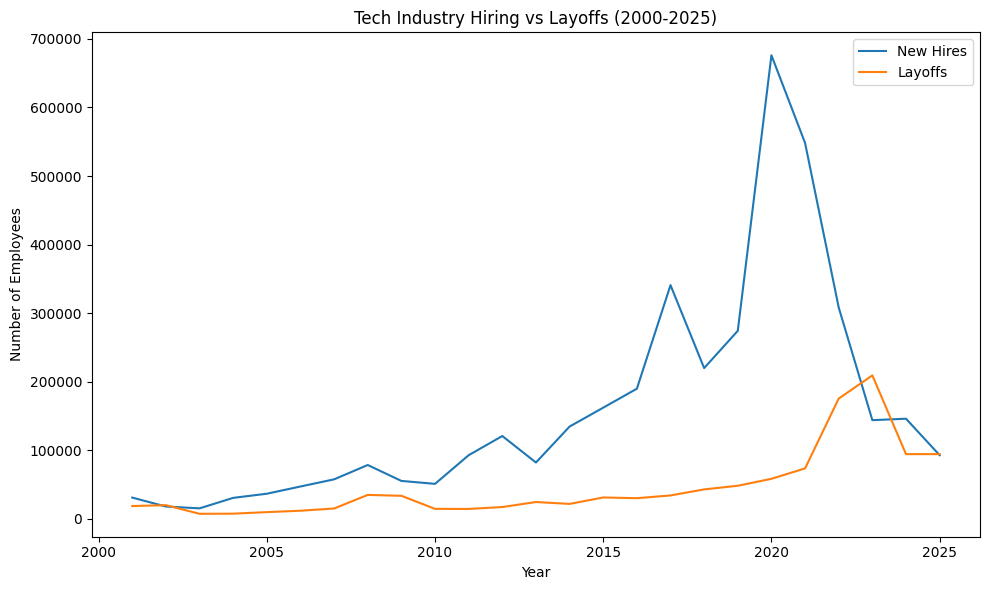

In [11]:
yearly = data.groupby("year")[["new_hires", "layoffs"]].sum().sort_index()

plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly["new_hires"], label="New Hires")
plt.plot(yearly.index, yearly["layoffs"], label="Layoffs")

plt.title("Tech Industry Hiring vs Layoffs (2000-2025)")
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.legend()
plt.tight_layout()
plt.show()

*Analysis:*

- Hiring consistently exceeded layoffs for most of the 2000–2020 period, showing a growth in the tech industry during those years.

- A sharp decline in hiring is observed around the year 2020, followed by a significant correction where layoffs increased substantially in the period of 2022–2023.

- The recent convergence of hiring and layoff levels suggests a period of workforce stabilization or contraction after rapid growth.

**`2. Net Workforce Change over Time:`**

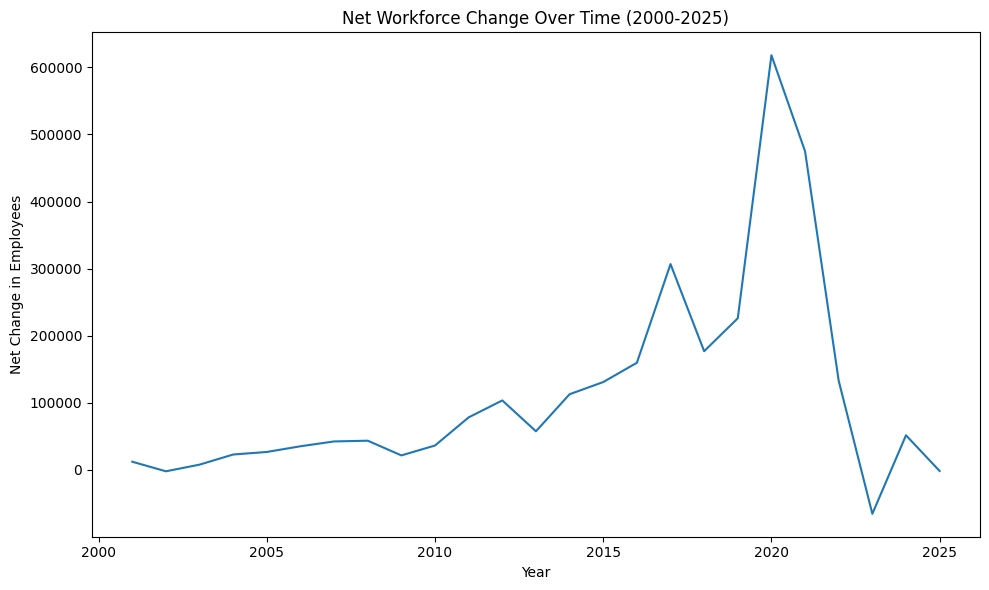

In [12]:
net_change_yearly = data.groupby("year")["net_change"].sum().sort_index()

plt.figure(figsize=(10,6))
plt.plot(net_change_yearly.index, net_change_yearly.values)

plt.title("Net Workforce Change Over Time (2000-2025)")
plt.xlabel("Year")
plt.ylabel("Net Change in Employees")
plt.tight_layout()
plt.show()

*Analsis:*

- The tech industry experienced steady positive net workforce growth from the early 2000s through 2020, with a significant peak around 2020 indicating rapid expansion.

- A sharp decline is observed after 2021, with net workforce change turning negative in 2023, reflecting a major contraction phase.

- The volatility in recent years suggests that rapid hiring during expansion periods was followed by corrective layoffs.

**`3. Top 15 Companies by Total Layoffs:`**

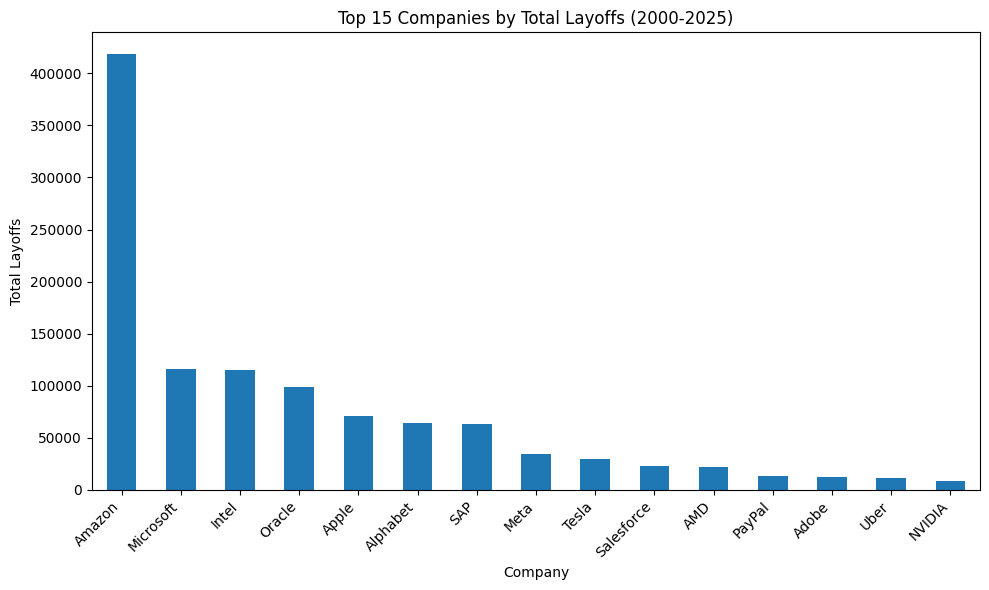

In [14]:
top_layoffs = (
    data.groupby("company")["layoffs"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
top_layoffs.plot(kind="bar")

plt.title("Top 15 Companies by Total Layoffs (2000-2025)")
plt.xlabel("Company")
plt.ylabel("Total Layoffs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

*Analysis:*

- Layoffs are highly concentrated among a few major firms, with one company significantly exceeding others in total workforce reductions.

- Large, established technology companies account for the majority of cumulative layoffs over the 2000–2025 period.

**`4. Revenue vs Layoffs:`**

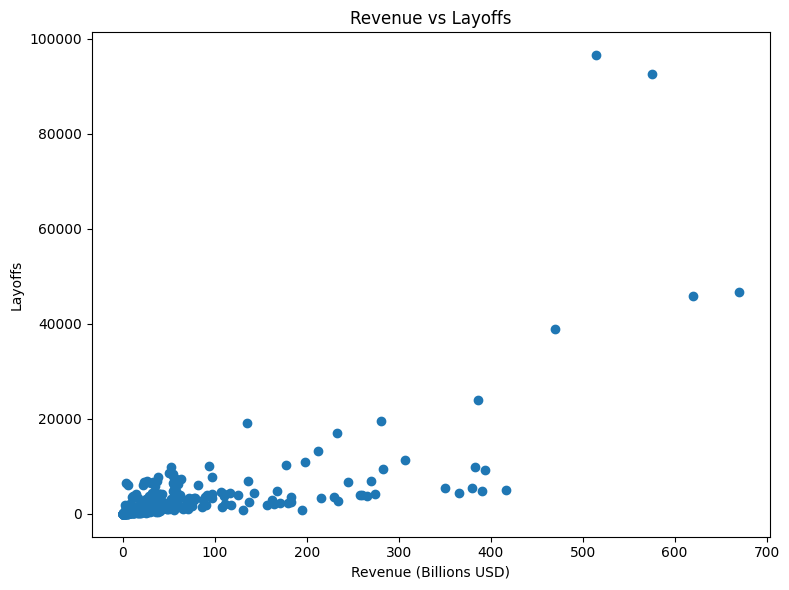

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(data["revenue_billions_usd"], data["layoffs"])

plt.title("Revenue vs Layoffs")
plt.xlabel("Revenue (Billions USD)")
plt.ylabel("Layoffs")
plt.tight_layout()
plt.show()

*Analysis:*

- The scatter plot shows that higher revenue does not necessarily prevent layoffs, as several high-revenue companies still experienced significant workforce reductions.

- While there is some clustering of lower layoffs among lower-revenue firms, large revenue values are associated with wide variability in layoff numbers.

- This suggests that layoffs may be influenced by strategic or market factors beyond revenue performance alone.